# DSCI508: FINAL PROJECT
## SAMEENA MUJAWAR

### Project Goal: 
   The goal of this project is to analyze the training data and predict the Trade Union Status of the Data Scientists.The target variable is "LeftUnion" which describes the status of each member (still a union member (LeftUnion_No); or no longer a member (LeftUnion_Yes)).

### Import Libraries

In [1]:
#Loading the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load and Analyze Dataset

In [2]:
#Import the dataset using pandas library using read.csv() and named data
data = pd.read_csv("Sameena-Train.csv")

#Displaying first 5rows of data
data.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,SAMEENA1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,81,341,Yes
1,SAMEENA2,Male,0,No,No,1,Yes,No,onlyViaER,Maryville,...,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,19,19,No
2,SAMEENA3,Female,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),90,6343,No
3,SAMEENA4,Female,0,No,No,61,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,90,5309,No
4,SAMEENA5,Male,0,No,No,16,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),75,1171,No


In [3]:
# Get dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   object
 1   gender            1000 non-null   object
 2   Management        1000 non-null   int64 
 3   USAcitizen        1000 non-null   object
 4   Married           1000 non-null   object
 5   MonthsInUnion     1000 non-null   int64 
 6   ContinuingEd      1000 non-null   object
 7   FeatureA          1000 non-null   object
 8   Connectivity      1000 non-null   object
 9   FeatureC          1000 non-null   object
 10  FeatureD          1000 non-null   object
 11  FeatureE          1000 non-null   object
 12  FeatureF          1000 non-null   object
 13  FeatureG          1000 non-null   object
 14  FeatureB          1000 non-null   object
 15  DuesFrequency     1000 non-null   object
 16  PaperlessBilling  1000 non-null   object
 17  PaymentMethod  

#### Statistical measures of data

In [4]:
# Statistical measures of each numeric columns using describe()
numeric_col = data.describe()
numeric_col

,Management,MonthsInUnion,MonthlyDues
count,1000.000000,1000.000000,1000.000000
mean,0.165000,33.769000,80.437000
std,0.371366,40.056412,361.640839
min,0.000000,0.000000,19.000000
25%,0.000000,9.000000,44.000000
50%,0.000000,29.000000,74.000000
75%,0.000000,54.250000,91.000000
max,1.000000,661.000000,11268.000000


#### Check missing values in data

In [5]:
#check missing values using isna() and sum() that count total number of missing values.
data.isna().sum()

ID                  0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

#### Display values of numeric variables

In [6]:
# Check all numeric columns values using for loop and value_counts().
for col in numeric_col:
    print(f"{data[col].value_counts()}")

0    835
1    165
Name: Management, dtype: int64
1      85
72     59
3      33
2      32
71     26
       ..
21      5
510     1
0       1
661     1
654     1
Name: MonthsInUnion, Length: 76, dtype: int64
20       98
70       37
85       33
19       27
21       27
         ..
23        1
117       1
52        1
11268     1
2184      1
Name: MonthlyDues, Length: 92, dtype: int64


#### Column names of data

In [7]:
#get column names using .columns after dataset
data.columns

Index(['ID', 'gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD',
       'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyDues', 'TotalDues',
       'LeftUnion'],
      dtype='object')

#### Convert TotalDues column to numeric

In [8]:
#Convert Totaldues to numerical column as it contains all integers.

# TotalDues contain "#Value!" irrelevant value.Replace it with space
data['TotalDues'] = data['TotalDues'].replace("#VALUE!", " ")

# data['TotalDues']= pd.to_numeric(data['TotalDues']), error='coerce' will handle missing values
data['TotalDues'] = pd.to_numeric(data['TotalDues'], errors= 'coerce')

# filling empty rows with zero because while standardization it will handle correctly
data['TotalDues'] = data['TotalDues'].fillna(0).astype('int64')

# Checking type of TotalDues column
data['TotalDues'].dtype

dtype('int64')

### Boxplot of Numeric columns

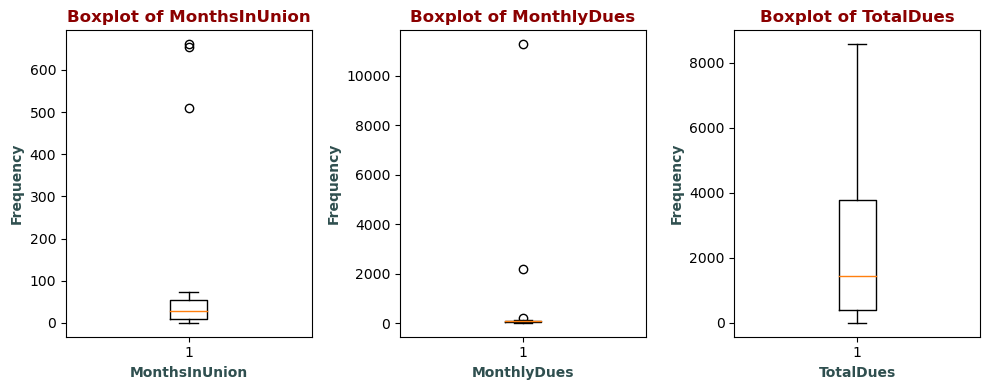

In [9]:
# using grid specs plot 3 charts in one row three columns
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(1,3)

#boxplot of MonthsInUnion column with appropriate title and label
ax1=fig.add_subplot(gs[0,0])
ax1.boxplot(data['MonthsInUnion'])
ax1.set_xlabel("MonthsInUnion", c='darkslategray', weight='bold')
ax1.set_ylabel("Frequency", c='darkslategray', weight='bold')
ax1.set_title("Boxplot of MonthsInUnion", c='darkred', weight='bold')

#boxplot of MonthlyDues column with appropriate title and label
ax2=fig.add_subplot(gs[0,1])
ax2.boxplot(data['MonthlyDues'])
ax2.set_xlabel("MonthlyDues", c='darkslategray', weight='bold')
ax2.set_ylabel("Frequency", c='darkslategray', weight='bold')
ax2.set_title("Boxplot of MonthlyDues", c='darkred', weight='bold')

#boxplot of TotalDues column with appropriate title and label
ax3 =fig.add_subplot(gs[0,2])
ax3.boxplot(data['TotalDues'])
ax3.set_xlabel("TotalDues", c='darkslategray', weight='bold')
ax3.set_ylabel("Frequency",c='darkslategray', weight='bold')
ax3.set_title("Boxplot of TotalDues", c='darkred', weight='bold')

# To avoid overlap with each other
plt.tight_layout()
# To avoid unwanted measures to display
plt.show()

### Heatmap of Numeric columns

C:\Users\moham\AppData\Local\Temp\ipykernel_4472\1364105601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


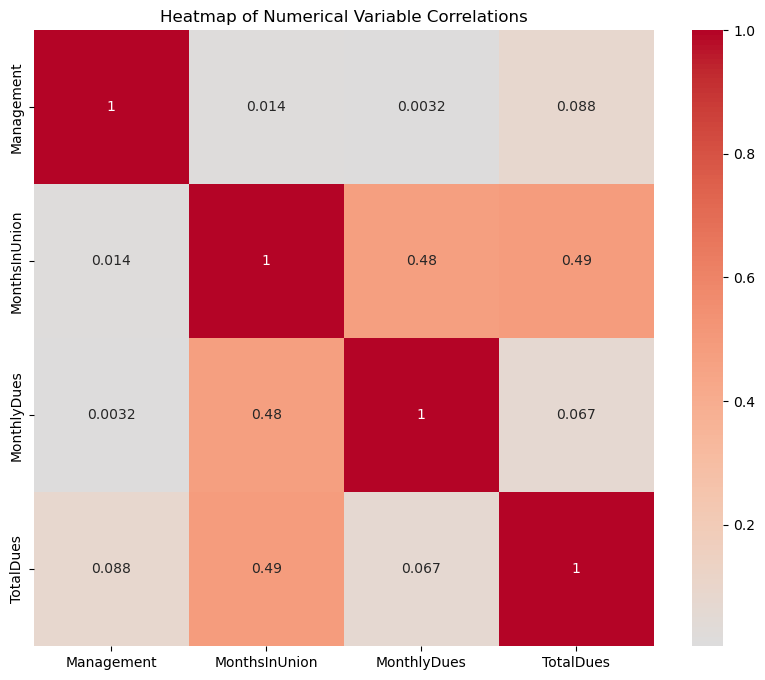

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap by giving appropriate title and axis name
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Numerical Variable Correlations')
plt.show()

### Histogram of MonthlyDues and TotalDues

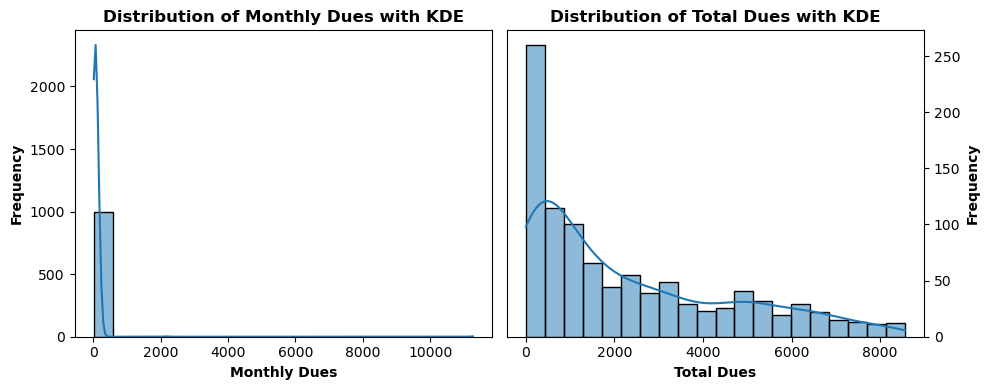

In [11]:
# Set the figure size
plt.figure(figsize=(10,4))

# Histogram for MonthlyDues with Kernel density estimation
plt.subplot(1,2,1)
sns.histplot(data['MonthlyDues'],bins=20, kde= True)
plt.title("Distribution of Monthly Dues with KDE", fontweight='bold')
plt.xlabel("Monthly Dues", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')

# Create a histogram  for Total Dueswith Kernel density estimation
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=data, x='TotalDues', bins=20, kde=True)
plt.title("Distribution of Total Dues with KDE", fontweight='bold')
plt.xlabel("Total Dues", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
ax2.yaxis.tick_right()  # Move y-axis ticks to the right
ax2.yaxis.set_label_position('right')

# display the graph appropriately
plt.tight_layout()
plt.show()

### Barplot of USA citizens agains the MonthlyDues filled with gender
##### To get an insight of demographic distribution

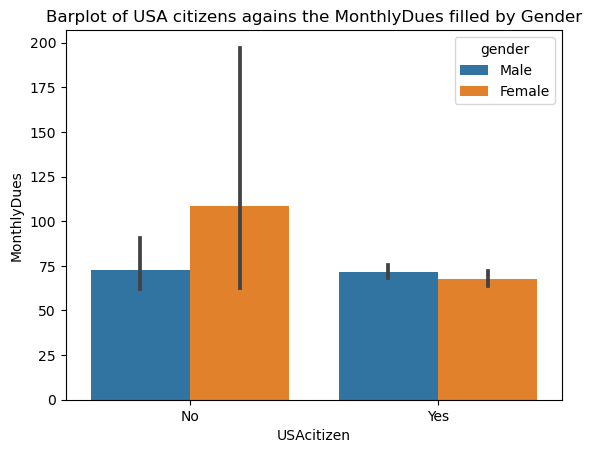

In [12]:
# Used seaborn library to display the barplot
     # fill color by gender column using 'hue' parameter
sns.barplot(x='USAcitizen', y='MonthlyDues',hue='gender', data= data)
plt.title("Barplot of USA citizens agains the MonthlyDues filled by Gender")
plt.show()

### Scatter plot of MonthsInUnion and TotalDues

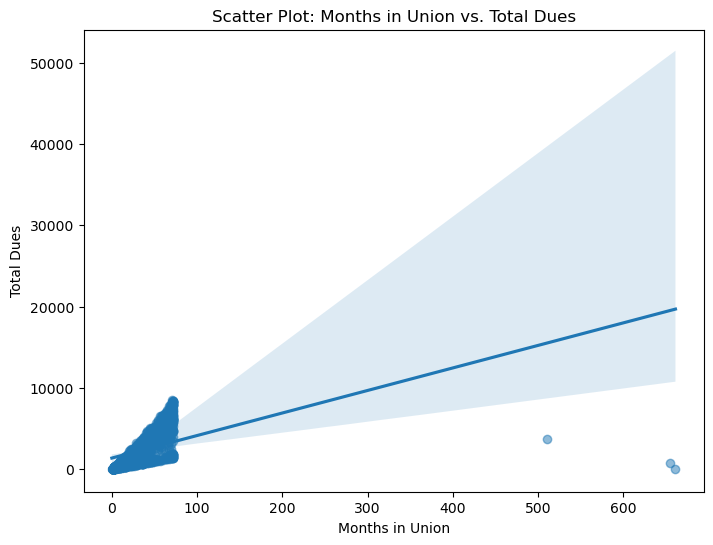

In [13]:
# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot with regression line
sns.regplot(data=data, x='MonthsInUnion', y='TotalDues', scatter_kws={'alpha': 0.5})
plt.title("Scatter Plot: Months in Union vs. Total Dues")   # title label
plt.xlabel("Months in Union")   # x axis label
plt.ylabel("Total Dues")        # y label

# Show the plot
plt.show()

###### Scatter plot showing Individual how stay for lesser duration in union tends to have less total dues and there are some outlier on left side showing individual who stayes for longer period tends to have more total dues.

### Violine plots

#### Violin plot of Total Dues Vs Payment Method

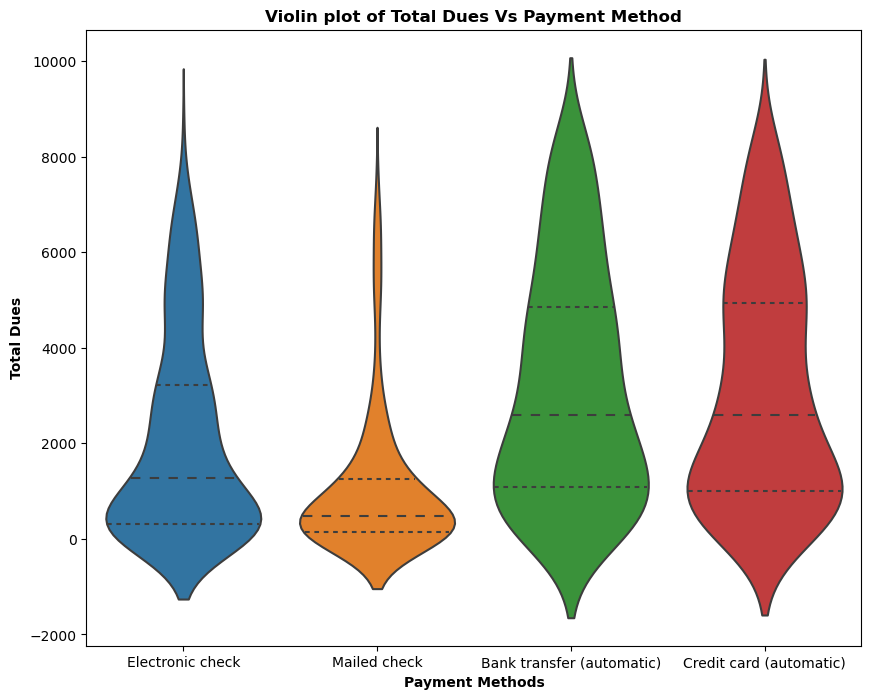

In [14]:
# Set the figure size using matplotlib library
fig = plt.figure(figsize=(10,8))

# Generating violin plot using seaborn library by setting the quartile
ax = sns.violinplot(data = data,
            x = 'PaymentMethod',
            y = 'TotalDues',
            scale ='width',
            inner = 'quartile')
# mentioned appropriate title and labs to the plot 
ax.set_title("Violin plot of Total Dues Vs Payment Method", fontweight='bold')
ax.set_xlabel("Payment Methods", fontweight='bold')
ax.set_ylabel("Total Dues" , fontweight='bold')

# to avoid unwanted information to print
plt.show()

### Pie chart of Married column

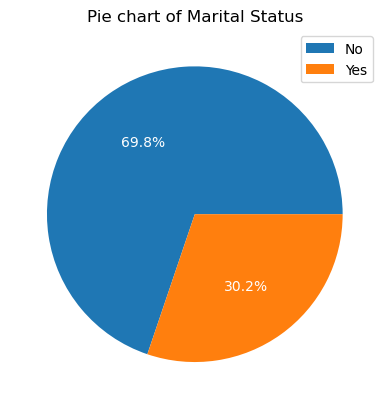

In [15]:
# Prepare the data for piechart
# Creating a dictionary to add values of married column using value_count()
df = data['Married'].value_counts().to_dict()

plt.pie(df.values(),   #pass values from dictionary
       labels= df.keys(),  # pass label from keys
       autopct='%1.1f%%',   # format to be plotted
       textprops = {'fontsize': 10, 'color' : "white"})  
plt.title("Pie chart of Marital Status")
plt.legend()   # add legend
plt.show()

#### List of Numerical Columns

In [16]:
#List of numeric columns to be normalized
num_col = ['MonthsInUnion', 'MonthlyDues', 'TotalDues', 'Management']

#### List of  Categorical Columns

In [17]:
# getting the categorical columns from the data by removing the target column 
  # making sure numerical column should not present
categorical_columns = [col for col in data.columns[:-1] if col not in num_col]
categorical_columns

['ID',
 'gender',
 'USAcitizen',
 'Married',
 'ContinuingEd',
 'FeatureA',
 'Connectivity',
 'FeatureC',
 'FeatureD',
 'FeatureE',
 'FeatureF',
 'FeatureG',
 'FeatureB',
 'DuesFrequency',
 'PaperlessBilling',
 'PaymentMethod']

### One hot encoding of categorical variables

In [18]:
# One hot encoding using get_dummies()
encoded = pd.get_dummies(data, columns=categorical_columns)

### Seprating Target and features variable

In [19]:
# Seprate target and feature variables
y = encoded['LeftUnion']
X =encoded.drop(columns=['LeftUnion'])

In [20]:
# removing the some features including target which are correlate to each other by saving them in variable as df
df = encoded.drop(columns=['LeftUnion','Connectivity_Dial-in','FeatureB_Maryville','FeatureB_No','FeatureF_Yes','FeatureC_No',
                       'FeatureC_Maryville','FeatureE_Yes','FeatureG_Yes','FeatureD_Maryville','FeatureF_No','FeatureE_No',
                      'FeatureG_No','FeatureD_No','FeatureE_Yes','FeatureF_Yes','DuesFrequency_Month-to-month', 'DuesFrequency_One year',
                       'DuesFrequency_Two year', 'PaymentMethod_Bank transfer (automatic)'])
df

,Management,MonthsInUnion,MonthlyDues,TotalDues,ID_SAMEENA1,ID_SAMEENA10,ID_SAMEENA100,ID_SAMEENA1000,ID_SAMEENA101,ID_SAMEENA102,...,FeatureD_Yes,FeatureE_Maryville,FeatureF_Maryville,FeatureG_Maryville,FeatureB_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,4,81,341,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,19,19,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,1
2,0,71,90,6343,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0,61,90,5309,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4,0,16,75,1171,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,46,30,1380,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
996,1,17,76,1233,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
997,0,27,101,2673,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
998,0,21,111,2317,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


### Normalize the Numerical Variables

In [21]:
# using StanderScaler() for normalization the numeric column
scaler = StandardScaler()

scaled_numerical_data =scaler.fit_transform(data[num_col])   # fit the scaler transform to the numeric variables
# display
scaled_numerical_data

array([[-7.43548762e-01,  1.55757219e-03, -8.69858296e-01,
        -4.44527604e-01],
       [-8.18480613e-01, -1.69969027e-01, -1.01186885e+00,
        -4.44527604e-01],
       [ 9.29929254e-01,  2.64565947e-02,  1.77718312e+00,
        -4.44527604e-01],
       ...,
       [-1.69071234e-01,  5.68887333e-02,  1.58615644e-01,
        -4.44527604e-01],
       [-3.18934937e-01,  8.45543139e-02,  1.61018797e-03,
        -4.44527604e-01],
       [ 9.54906538e-01, -4.54739148e-02,  9.76719914e-01,
        -4.44527604e-01]])

### Combine Encoded and Normalized Data

In [22]:
# Combine the data that numeric and one hot encoded data
combined_data = np.concatenate((df, scaled_numerical_data), axis=1)
combined_data

array([[ 0.00000000e+00,  4.00000000e+00,  8.10000000e+01, ...,
         1.55757219e-03, -8.69858296e-01, -4.44527604e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.90000000e+01, ...,
        -1.69969027e-01, -1.01186885e+00, -4.44527604e-01],
       [ 0.00000000e+00,  7.10000000e+01,  9.00000000e+01, ...,
         2.64565947e-02,  1.77718312e+00, -4.44527604e-01],
       ...,
       [ 0.00000000e+00,  2.70000000e+01,  1.01000000e+02, ...,
         5.68887333e-02,  1.58615644e-01, -4.44527604e-01],
       [ 0.00000000e+00,  2.10000000e+01,  1.11000000e+02, ...,
         8.45543139e-02,  1.61018797e-03, -4.44527604e-01],
       [ 0.00000000e+00,  7.20000000e+01,  6.40000000e+01, ...,
        -4.54739148e-02,  9.76719914e-01, -4.44527604e-01]])

### Principal Component Analysis (PCA)

In [23]:
# Apply 5 number of components
pca =PCA(n_components =5)
X_pca = pca.fit_transform(combined_data)   # fit the pca to the combined data

In [24]:
# Display pca values
print(X_pca)

[[-1.97240941e+03  2.14458356e+01 -1.37912732e+01  2.17822669e-01
   1.06732061e+00]
 [-2.29508166e+03 -3.69723726e+01 -1.10738055e+01 -9.25444801e-01
  -7.16507778e-01]
 [ 4.02968707e+03 -3.42888680e+01  4.06793904e+00 -1.21277874e+00
  -6.09037918e-01]
 ...
 [ 3.59782174e+02  1.61220045e+01 -1.07090046e+01  5.06357922e-02
   1.12403477e+00]
 [ 3.87419888e+00  2.98471382e+01 -1.43151707e+01  1.13319411e-01
   7.31569266e-01]
 [ 2.21458783e+03 -3.96258581e+01  2.10713281e+01 -1.05492569e+00
  -2.53058945e-01]]


In [25]:
# calculate the explained_variance_ratio using pca
explained_variance_ratio =  pca.explained_variance_ratio_
explained_variance_ratio

array([9.75105373e-01, 2.47230169e-02, 1.70374696e-04, 2.43750753e-07,
       1.36924603e-07])

### Scree Plot

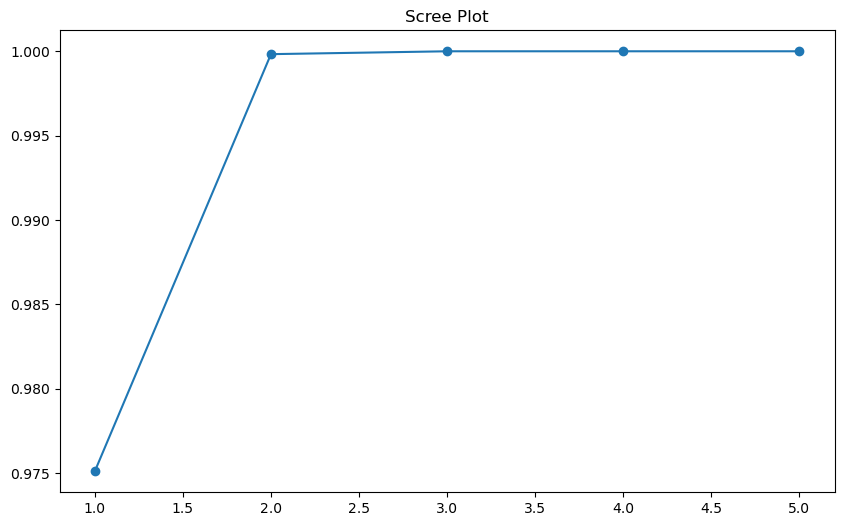

In [26]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create the scree plot
plt.figure(figsize=(10, 6))   # set figure size
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.title("Scree Plot")   # title of scree plot
plt.show()

### Split the train and test data by 80% and 20%

In [27]:
# Seprating the traininig set by 80% and test set by 20% randomly using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

## Logistic regession model

In [28]:
#Prepare  logistic regression model
logreg = LogisticRegression()

#fit the model to the train data
logreg.fit(X_train, y_train)

LogisticRegression()

#### Accuracy and Prediction of Logistic regression model on test data

In [29]:
# Predict the prediction on test data
logreg_pred= logreg.predict(X_test)

#calculate the accuracy using accuracy_score()
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [30]:
#Display the accuracy of logistc regression model on test data
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.785


## Decision Tree model

In [31]:
#Prepare model
# Initialize a DecisionTreeClassifier instance
clf = DecisionTreeClassifier()

#fit the model to the train data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

####  Accuracy and Prediction of Decision Tree model on test data

In [32]:
# Predict the decision tree model on test data
clf_pred = clf.predict(X_test)

#calculate the accuracy on test data
clf_accuracy = accuracy_score(y_test, clf_pred)

In [33]:
#Display the accuracy of DecisionTree model on test data
print("Decision Tree Accuracy:", clf_accuracy)

Decision Tree Accuracy: 0.715


## Random Forest model

In [34]:
# Prepare the model
# Initialize a RandomForestClassifier instance
rf = RandomForestClassifier()

# fit the RandomForestClassifier using the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

#### Accuracy and Prediction of Random Forest model on test data

In [35]:
#Predict the prediction
rf_pred = rf.predict(X_test)
# check accuracy on test data
rf_accuracy = accuracy_score(y_test, rf_pred)

In [36]:
#Display the accuracy of RandomForestClassifier model on test data
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.805


## Support Vector Machine

In [37]:
#Prepare the model
# Initialize the SVM by setting kernel linear.
svm_model =SVC(kernel='linear', C=1.0)

#Fit the SVM using training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#### Accuracy and Prediction of Support Vector Machine model on test data

In [38]:
# predict the svm model on test data
svm_pred = svm_model.predict(X_test)

In [39]:
# Check accuracy on test data
svm_accuracy = accuracy_score(y_test, svm_pred)

In [40]:
#Display the accuracy of SVM model on test data
print("Random Forest Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.79


## Bar plot of Accuracy scores

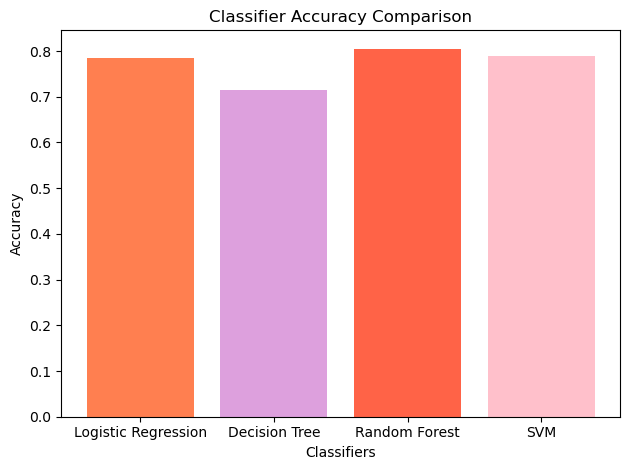

In [41]:
# Making a dictionary where mapping accuracy rate with model
accuracy_score =  {'Logistic Regression':logreg_accuracy,
                   'Decision Tree': clf_accuracy,
                   'Random Forest': rf_accuracy,
                   'SVM': svm_accuracy
}

#Bar plot of all accuracy with models to see the differences
plt.bar(accuracy_score.keys(), accuracy_score.values(), color= ['coral', 'plum', 'tomato', 'pink'])
plt.title("Classifier Accuracy Comparison")
plt.xlabel("Classifiers")
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

## Models Comparison:


### Logistic Regession accuracy is 78%.
   This outcome indicates that the Logistic Regression model has successfully captured the linear relationship between the features and target by 78%.
   
### Decision Tree showing 72% accuracy.  
   As it better to capture the non-linear relationship between the features and target.

### The Random Forest classifier achieved an accuracy of 80%.
   This means random forest combines multiple decision trees and reduce overfitting.As a result, the accuracy of the model has improved.
   
### Support Vector Machine 79%.
   As it is less prone for overfitting and can handle many features.
  
### Comparing the hypothetical guess of 60% accuracy 
   The accuracy of models (Logistic Regression=78%, Decision tree=72%, Random Forest=80%, SVM=79%) are higher than 60%, which suggests that they are performing better than hypothetical guess. This means that the features used in models contain valuable information for predicting whether a member will remain or not.
 

### As the model learning from the experience and based on random forest model accuracy approximately 80% of the current members will likely remain with the United Data Scientists Union (UDSU).


## Describe how you would improve your project if you had more time?

1. I was also planning to create same project using R programming language which would help me to enhance the knowledge with code and creating models so that I can differentiate between them.But the project requirement was using only one language. 
2. This project helps to gain the knowledge by creating different models using one data and also different kinds of plots such as pie, violin and scree plots.

##  THANK YOU RESPECTED KUHELI SEN FOR YOUR GUIDANCE IN MACHINE LEARNING COURSE